In [1]:
import numpy as np
import pandas as pd 
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

,y,ds
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


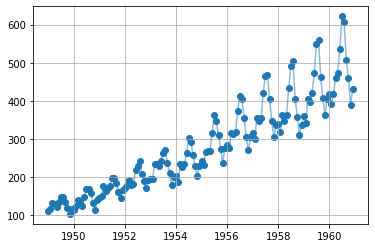

In [2]:
df = sns.load_dataset('flights')
index = pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS') 
df['ds'] = index
df.drop(['year', 'month'], 1, inplace=True)
df.columns = ['y', 'ds']
plt.scatter(df['ds'], df['y'])
plt.plot(df['ds'], df['y'], alpha=0.5)
plt.grid()
df.head()

In [3]:
print(df.shape)

(144, 2)


INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


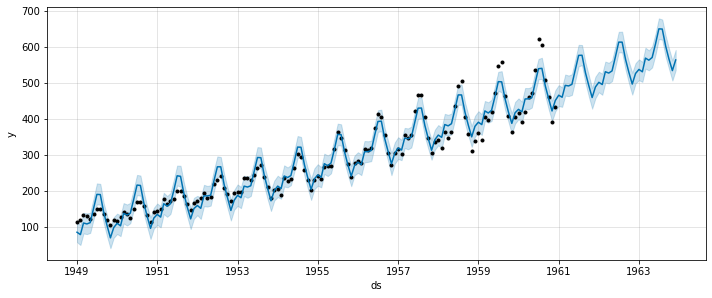

In [5]:
m = Prophet()
m.fit(df, )
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)
fig.set_size_inches(10,4)

In [5]:

print(T)

144


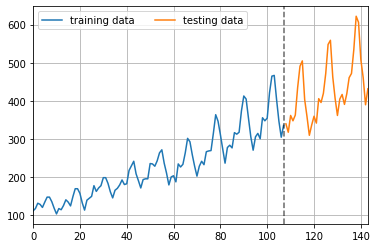

In [23]:
T = df.shape[0]
split = int(T*0.75)
train_df = df.iloc[:split]
test_df = df.iloc[split:]
split_date = train_df.index[-1]

fig, ax = plt.subplots()
train_df['y'].plot(ax=ax, label='training data')
test_df['y'].plot(ax=ax, grid=1, label='testing data')
ax.axvline(split_date, color='k', alpha=0.6, ls='dashed', )
ax.legend(ncol=2);

In [ ]:
X_train = train_df['y'].values.reshape(-1,1)
y_train = train_df['ds'].values.reshape(-1, 1)
y_test = test_df['ds'].values.reshape(-1, 1)
X_test = test_df['y'].values.reshape(-1, 1)
XX = train_df.index +1
print(X_train)

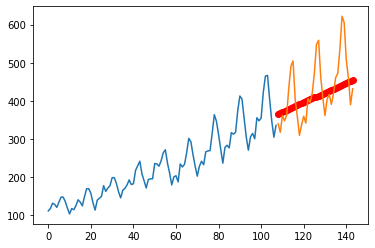

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(train_df.index.values.reshape(-1, 1),X_train)
GG = model.predict(test_df.index.values.reshape(-1, 1))
#model.predict(20)
#model.predict(y_test)
plt.plot(train_df.index.values.reshape(-1, 1),X_train)
plt.scatter(test_df.index.values.reshape(-1, 1),GG, c='r',)
plt.plot(test_df.index.values.reshape(-1, 1),X_test)
#print(GG)


In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = SARIMAX(train_df['y'], 
              order=(1,1,1),
              trend='c'
             )
fit_mod = mod.fit()


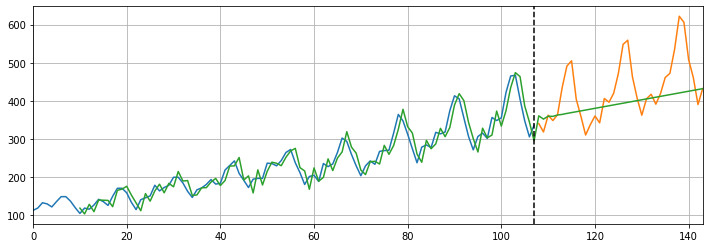

In [28]:
preds = fit_mod.predict(start=train_df.index[0],
                    end=test_df.index[-1],
                    )
preds = preds[10:]
fig, ax = plt.subplots(figsize=(12,4))
train_df['y'].plot(ax=ax)
test_df['y'].plot(ax=ax)
preds.plot(ax=ax, grid=True)
plt.axvline(split_date, c='k', linestyle='dashed')
plt.show()

In [ ]:
plt.scatter(X, y)
plt.plot(X, y);
print(X)

In [11]:
print(train_df)

       y         ds
0    112 1949-01-01
1    118 1949-02-01
2    132 1949-03-01
3    129 1949-04-01
4    121 1949-05-01
..   ...        ...
103  467 1957-08-01
104  404 1957-09-01
105  347 1957-10-01
106  305 1957-11-01
107  336 1957-12-01

[108 rows x 2 columns]
